Install libraries:

pip install geopandas

pip install adjustText


In [11]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text



In [12]:
!python --version

Python 3.8.10


In [19]:
import shapely
print(shapely.__version__)

2.0.1


In [15]:
print(gp.__version__)

0.10.2


In [20]:
print(matplotlib.__version__)

3.5.1


In [21]:
plt.rcParams.update({'axes.facecolor':'black'})

In [22]:
df1 = pd.read_csv('./DATA/FCC/Fabric_BSL_07122023_rel_3_2/FCC_Active_BSL_07212023_rel_3_2.csv')

In [24]:
df1.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1, inplace=True)

In [28]:
df1.columns

Index(['location_id', 'unit_count', 'bsl_flag', 'building_type_code',
       'land_use_code', 'address_confidence_code', 'county_geoid',
       'block_geoid', 'h3_9', 'latitude', 'longitude', 'fcc_rel'],
      dtype='object')

In [7]:
#ookla_df = gp.read_file('./DATA/OOKLA/OOKLA-mi-townships-2019q1-2021q4.shp')

In [8]:
#ookla_df = gp.GeoDataFrame(ookla_df, crs="EPSG:4326")

In [9]:
#ookla_df

In [29]:
df2 = pd.read_csv('./DATA/FCC/Fabric_BSL_07122023_rel_3_2/FCC_Active_NOBSL_07212023_rel_3_2.csv')

In [30]:
df2.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1, inplace=True)

In [31]:
result_df = pd.concat([df1, df2])

In [32]:
#result_df = result_df.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1)

In [33]:
result_df.columns

Index(['location_id', 'unit_count', 'bsl_flag', 'building_type_code',
       'land_use_code', 'address_confidence_code', 'county_geoid',
       'block_geoid', 'h3_9', 'latitude', 'longitude', 'fcc_rel'],
      dtype='object')

In [34]:
all_locations_df = gp.GeoDataFrame(
    result_df, crs=4326, geometry=gp.points_from_xy(result_df.longitude, result_df.latitude))

In [35]:
all_locations_df.to_pickle('./DATA/results/gdf_all_locations.pkl')

In [36]:
all_locations_df.to_file('./DATA/results/all_locations.shp', driver='ESRI Shapefile')


/tmp/ipykernel_182/3389400805.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_locations_df.to_file('./DATA/results/all_locations.shp', driver='ESRI Shapefile')


<AxesSubplot:>

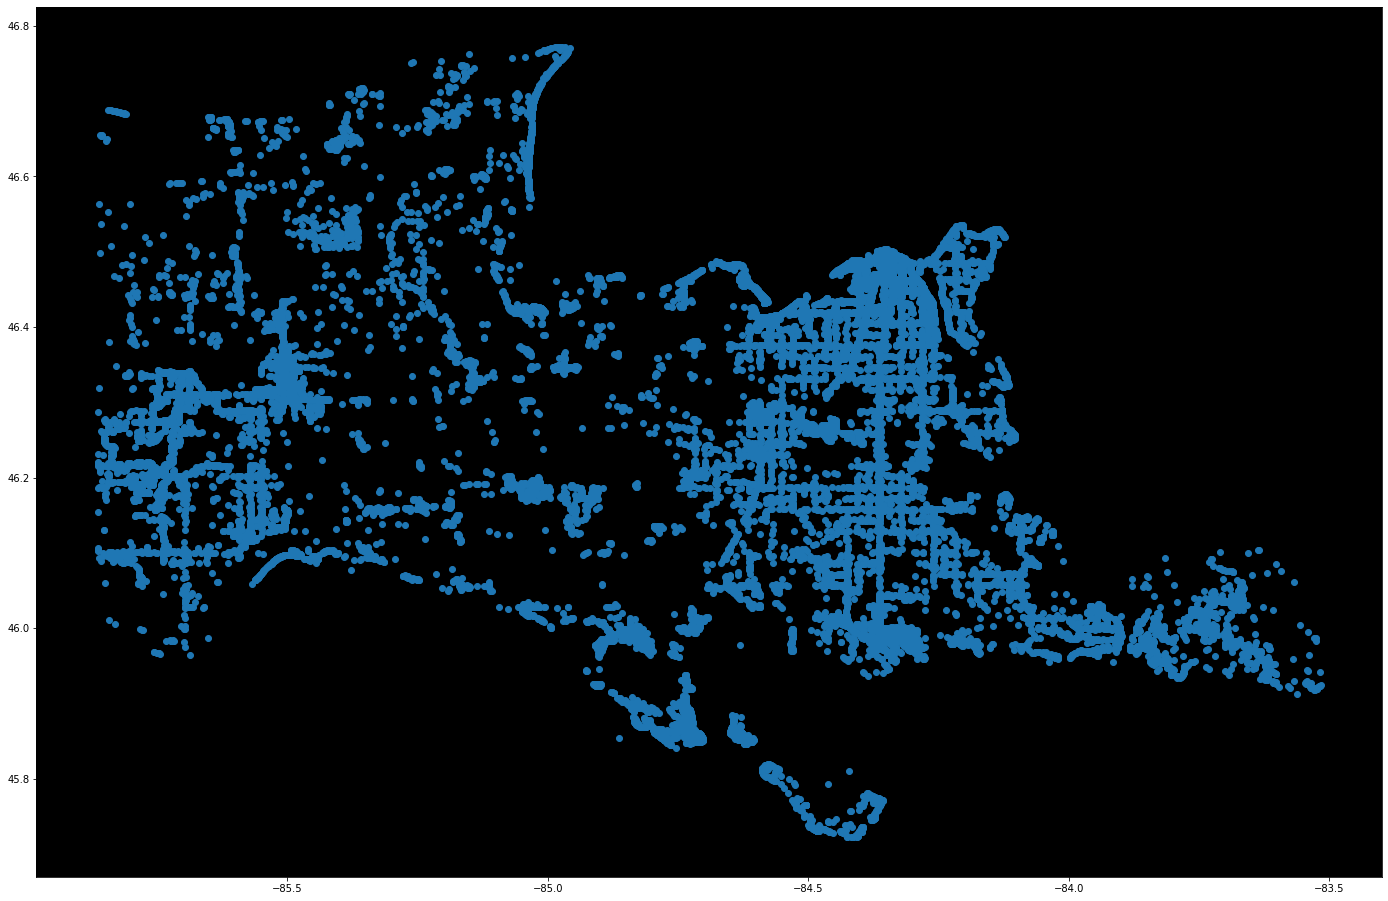

In [37]:
all_locations_df.plot(figsize=(32,16))

In [38]:
df3 = pd.read_csv('./DATA/FCC/state26_unserved_unfunded_20230831.csv')

In [39]:
merged_df = pd.merge(result_df, df3, how='inner', on='location_id')

In [40]:
#Add geomety to merged data Frame
usuf_location_df = gp.GeoDataFrame(
    merged_df, crs=4326, geometry=gp.points_from_xy(merged_df.longitude, merged_df.latitude))

In [41]:
usuf_location_df.columns

Index(['location_id', 'unit_count', 'bsl_flag', 'building_type_code',
       'land_use_code', 'address_confidence_code', 'county_geoid',
       'block_geoid_x', 'h3_9', 'latitude', 'longitude', 'fcc_rel', 'geometry',
       'block_geoid_y', 'h3_res8_id', 'wired_dl25_ul3_r', 'wired_dl100_ul20_r',
       'terrestrial_dl25_ul3_r', 'terrestrial_dl100_ul20_r',
       'wiredlfw_dl25_ul3_r', 'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b',
       'wired_dl100_ul20_b', 'terrestrial_dl25_ul3_b',
       'terrestrial_dl100_ul20_b', 'wiredlfw_dl25_ul3_b',
       'wiredlfw_dl100_ul20_b'],
      dtype='object')

In [42]:
usuf_location_df.to_pickle('./DATA/results/gdf_usuf_location_df.pkl')

In [43]:
usuf_location_df.to_file('./DATA/results/usuf_location_df.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/3000055229.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  usuf_location_df.to_file('./DATA/results/usuf_location_df.shp', driver='ESRI Shapefile')


<AxesSubplot:>

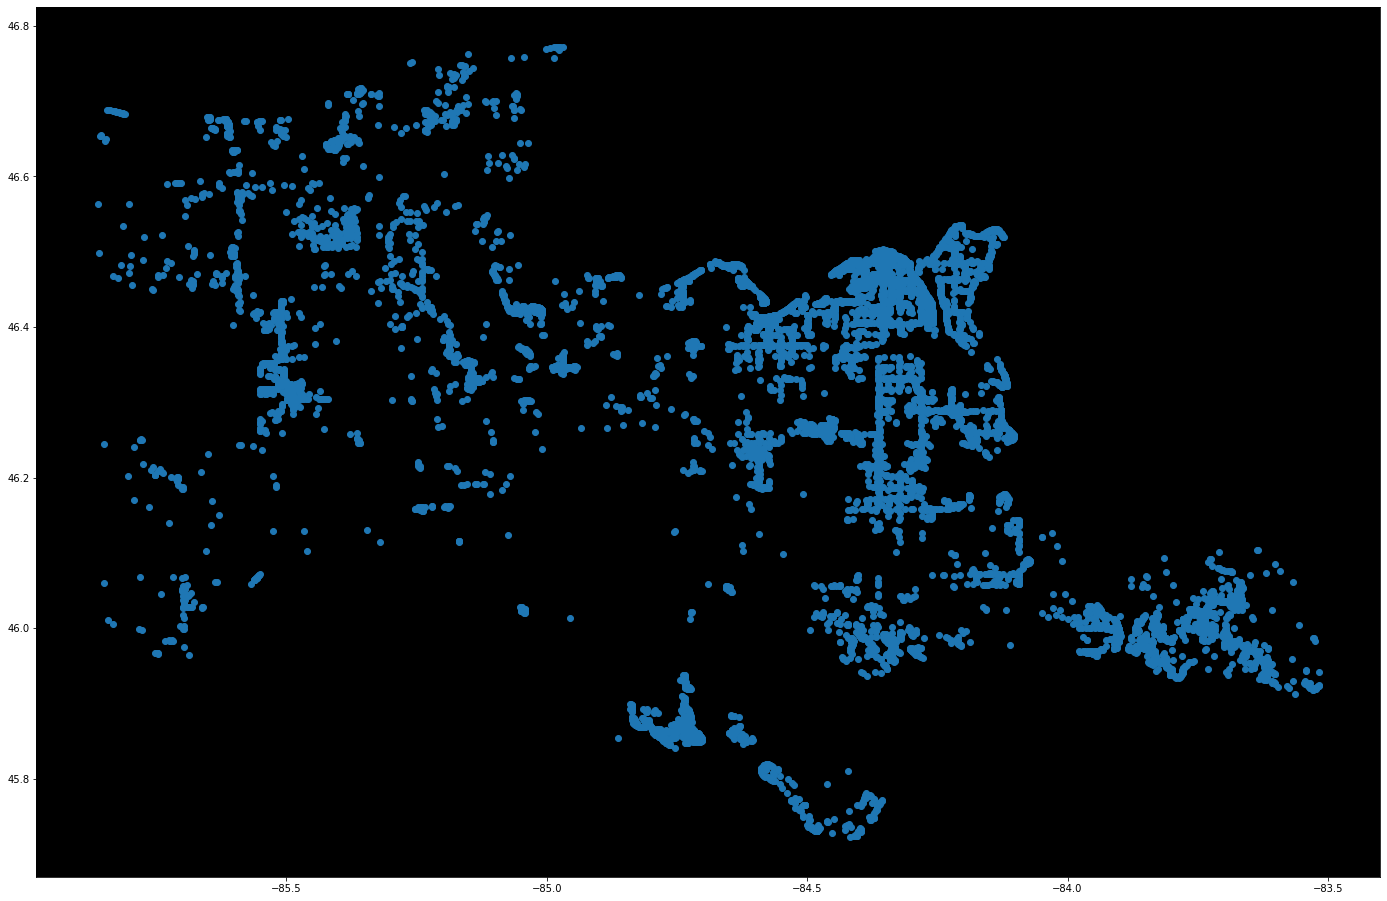

In [44]:
usuf_location_df.plot(figsize=(32,16))

In [45]:

#open MI Survey Sections

eup_sections = gp.read_file('./DATA/MI/Sections-Counties-17-48-49/Public_Land_Survey_Sections.shp')

In [46]:
eup_sections.columns

Index(['OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'geometry'],
      dtype='object')

In [47]:
eup_sections.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# eup_sections.head

<AxesSubplot:>

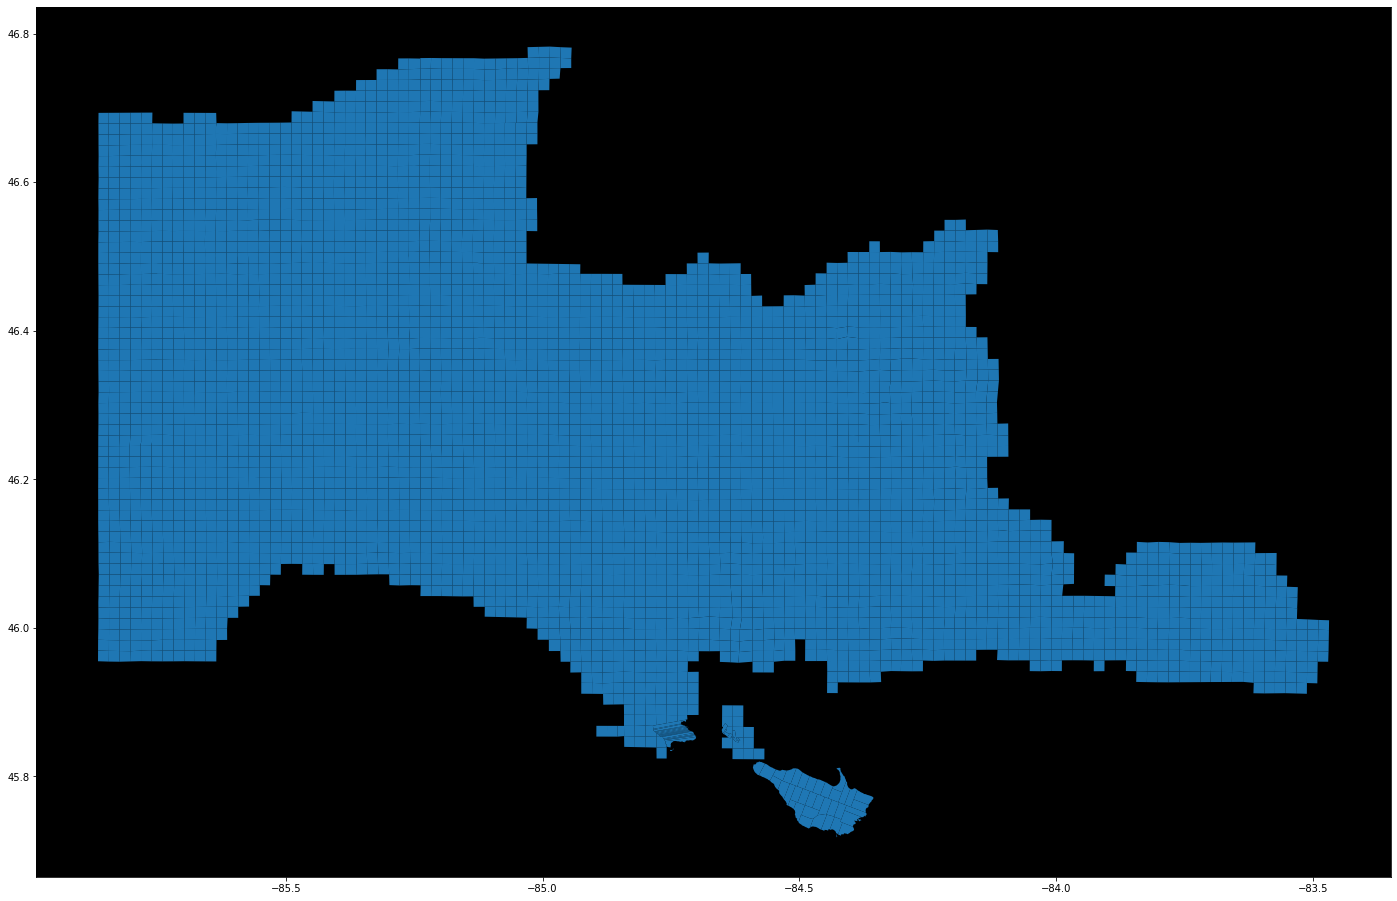

In [49]:
eup_sections.plot(figsize=(32,16))

In [50]:
#locations_in_sections = gp.sjoin(usuf_location_df, eup_sections, how="inner", predicate='intersects')

locations_in_sections = gp.sjoin(eup_sections, usuf_location_df, how="inner", predicate='intersects')

In [53]:
locations_in_sections.columns

Index(['OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'geometry',
       'index_right', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid_x', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'block_geoid_y', 'h3_res8_id', 'wired_dl25_ul3_r',
       'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

In [54]:
locations_in_sections.to_pickle('./DATA/results/gdf_locations_in_sections.pkl')

In [56]:
locations_in_sections.to_file('./DATA/results/gdf_locations_in_sections.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/3833423746.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  locations_in_sections.to_file('./DATA/results/gdf_locations_in_sections.shp', driver='ESRI Shapefile')


In [57]:
#sections_with_network = gp.sjoin(eup_sections, ookla_df, how="inner", predicate='intersects')

NameError: name 'ookla_df' is not defined

In [60]:
sections_with_network.columns

Index(['OBJECTID_1', 'OBJECTID_left', 'michigan_M', 'PERIMETER', 'TOWN',
       'RANGE', 'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT',
       'OTHER', 'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1',
       'Shape_ST_2', 'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre_left',
       'ShapeSTLen_left', 'geometry', 'index_right', 'quadkey', 'avg_d_kbps',
       'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'index_righ',
       'OBJECTID_right', 'FIPSCODE', 'FIPSNUM', 'NAME', 'LABEL', 'TYPE',
       'SQKM', 'SQMILES', 'ACRES', 'VER', 'LAYOUT', 'PENINSULA',
       'ShapeSTAre_right', 'ShapeSTLen_right', 'avg_d_mbps', 'avg_u_mbps',
       'year_qtr'],
      dtype='object')

In [74]:
sections_with_network.to_file('./DATA/results/sections_with_network.shp', driver='ESRI Shapefile')

/tmp/ipykernel_1073/948633307.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_network.to_file('./DATA/results/sections_with_network.shp', driver='ESRI Shapefile')


In [ ]:
sections_with_network.to_pickle('./DATA/results/gdf_sections_with_network.pkl')

<AxesSubplot:>

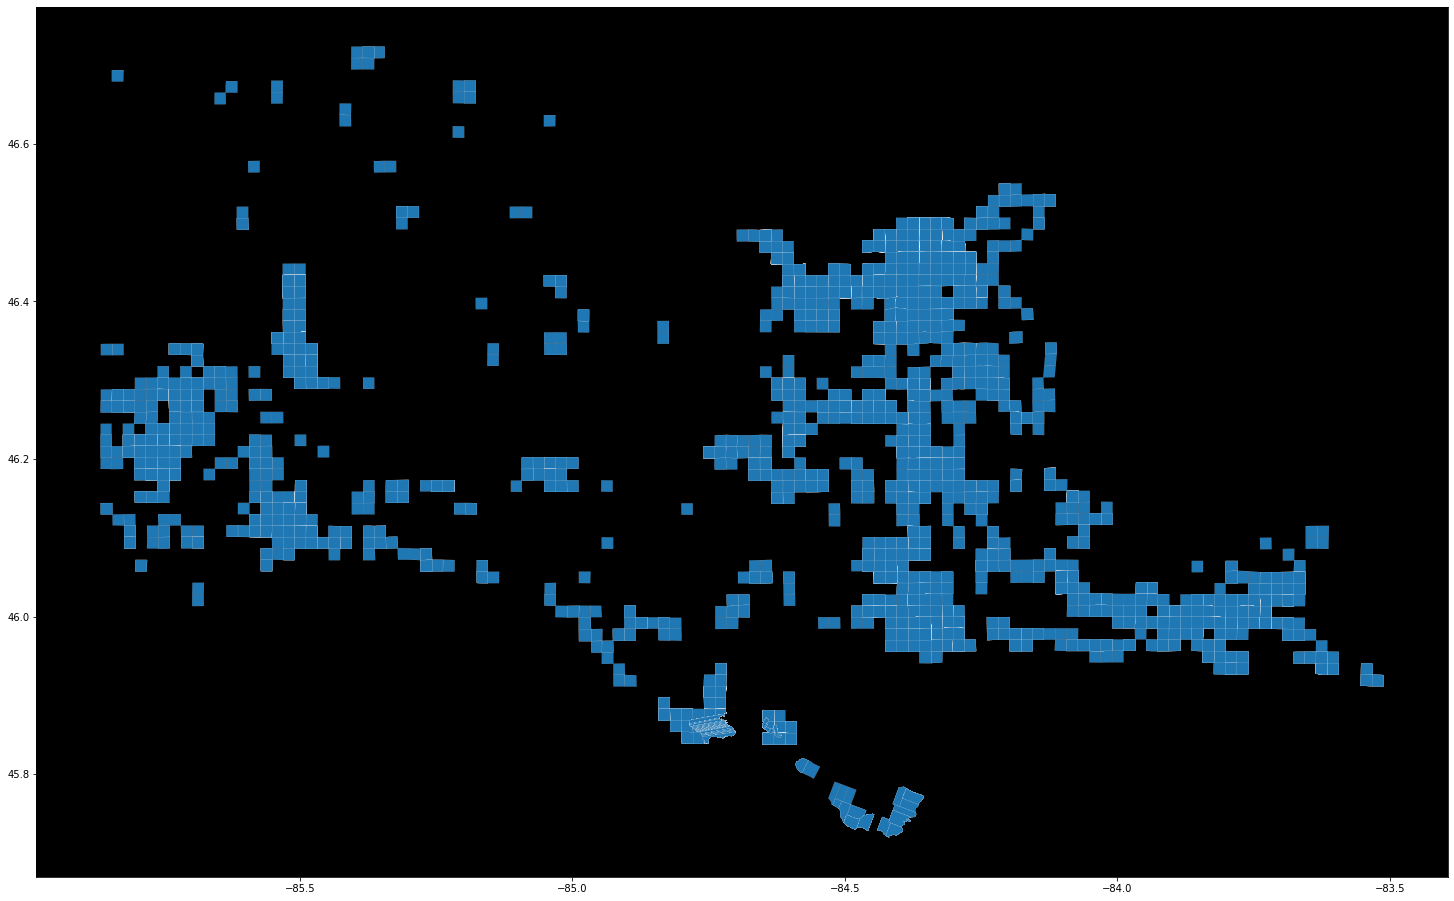

In [61]:
sections_with_network.plot(figsize=(40,16), edgecolor='white', linewidth=0.1)

In [30]:
locations_in_sections.columns

Index(['OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'geometry',
       'index_right', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid_x', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'block_geoid_y', 'h3_res8_id', 'wired_dl25_ul3_r',
       'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

<AxesSubplot:>

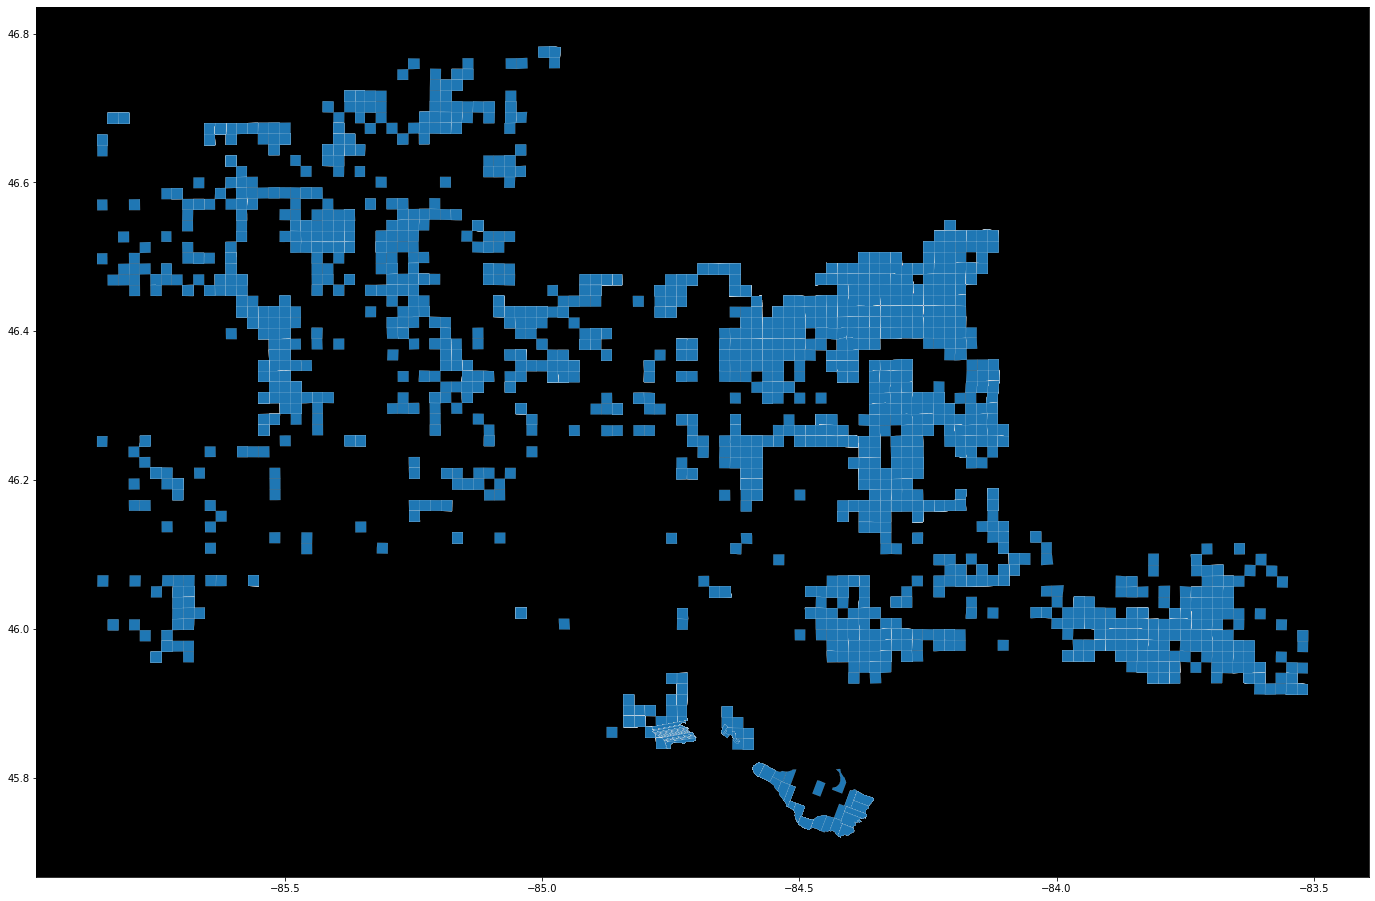

In [32]:
locations_in_sections.plot(figsize=(40,16), edgecolor='white', linewidth=0.1)

In [37]:
locations_in_sections

,OBJECTID_1,OBJECTID,michigan_M,PERIMETER,TOWN,RANGE,SECTION,SEC,TWNRNG,TWNRNGSEC,...,terrestrial_dl25_ul3_r,terrestrial_dl100_ul20_r,wiredlfw_dl25_ul3_r,wiredlfw_dl100_ul20_r,wired_dl25_ul3_b,wired_dl100_ul20_b,terrestrial_dl25_ul3_b,terrestrial_dl100_ul20_b,wiredlfw_dl25_ul3_b,wiredlfw_dl100_ul20_b
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
1,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,U,U,U,U,U,U,U,U,U,U
1,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,U,U,U,U,U,U,U,U,U,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,U,U,U,U,C,C,C,C,C,C
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U


In [44]:
mlab_d_df = pd.read_csv('./DATA/MLABS/DownloadTests-010119-100123.csv')

In [45]:
from shapely import wkt
mlab_d_df.rename(columns={"geometry": "wkt"}, inplace=True)
mlab_d_df['geometry'] = mlab_d_df['wkt'].apply(wkt.loads)
#gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

In [47]:
mlab_d_df = gp.GeoDataFrame(mlab_d_df, crs='epsg:4326')


In [52]:
mlab_d_df.columns

Index(['id', 'TestTime', 'Latitude', 'Longitude', 'wkt', 'DownMeanMbps',
       'DownminRTT', 'geometry'],
      dtype='object')

In [55]:
mlab_d_df.drop(['Latitude', 'Longitude', 'wkt'], axis=1, inplace=True)

In [72]:
mlab_d_df

,id,TestTime,DownMeanMbps,DownminRTT,geometry
0,lYektYZCb0G5JEwceOUlxA,2019-11-20 06:06:26.155254 UTC,4.159672,27.000,POINT (-84.21230 45.33650)
1,U2czRKYAU1gXpwn2qPzzMw,2019-11-20 06:05:40.499908 UTC,17.379948,6.000,POINT (-84.21230 45.33650)
2,6K3evuv60ZfieeNb_F6HZA,2019-11-09 17:42:23.618899 UTC,1.945856,85.000,POINT (-85.26730 45.07480)
3,A6hi_noxg2xHhAG19gCyAw,2019-11-09 06:08:02.265106 UTC,9.590369,6.000,POINT (-84.21230 45.33650)
4,T8dpGLfb-_USmkLtgisfPA,2019-11-09 17:32:37.569563 UTC,7.255742,22.000,POINT (-84.79240 45.44050)
...,...,...,...,...,...
631656,ndt-d2dj7_1667103700_0000000000305181,2022-12-18 15:53:43.307638 UTC,52.726673,8.940,POINT (-85.22450 45.26440)
631657,ndt-8k7vk_1667000282_000000000032B74A,2022-12-18 16:20:25.936298 UTC,198.593264,12.539,POINT (-85.22450 45.26440)
631658,ndt-8k7vk_1667000282_000000000032AEC5,2022-12-18 15:30:32.183699 UTC,169.238676,12.000,POINT (-85.22450 45.26440)
631659,ndt-kt8ph_1666991603_000000000033EE69,2022-12-18 17:44:19.155316 UTC,16.624732,12.778,POINT (-85.22450 45.26440)


In [69]:
sections_with_mlab_download = gp.sjoin(eup_sections, mlab_d_df, how="inner", predicate='intersects')

<AxesSubplot:>

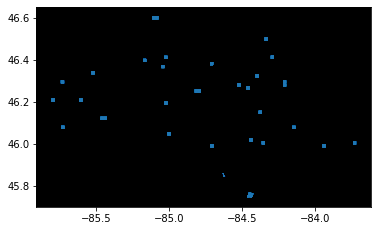

In [71]:
sections_with_mlab_download.plot()

In [75]:
sections_with_mlab_download.to_file('./DATA/MLABS/sections_with_mlab_download_010119-100123.shp', driver='ESRI Shapefile')

/tmp/ipykernel_1209/1174176307.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_mlab_download.to_file('./DATA/MLABS/sections_with_mlab_download_010119-100123.shp', driver='ESRI Shapefile')


In [66]:
mlab_u_df = pd.read_csv('./DATA/MLABS/UploadSample-010119-100123.csv')

In [67]:
mlab_u_df.rename(columns={"geometry": "wkt"}, inplace=True)
mlab_u_df['geometry'] = mlab_u_df['wkt'].apply(wkt.loads)
mlab_u_df = gp.GeoDataFrame(mlab_u_df, crs='epsg:4326')
#mlab_u_df.drop(['wkt', 'SubdivisionName'], axis=1, inplace=True)
mlab_u_df.columns

Index(['UUID', 'UpMeanMbps', 'UpminRTT', 'wkt', 'Subdivision1Name',
       'geometry'],
      dtype='object')

In [68]:
mlab_u_df.drop(['wkt', 'Subdivision1Name'], axis=1, inplace=True)

In [73]:
sections_with_mlab_upload = gp.sjoin(eup_sections, mlab_u_df, how="inner", predicate='contains')

In [74]:
sections_with_mlab_upload

,OBJECTID_1,OBJECTID,michigan_M,PERIMETER,TOWN,RANGE,SECTION,SEC,TWNRNG,TWNRNGSEC,...,Shape_ST_2,Shape_ST_3,Shape_ST_4,ShapeSTAre,ShapeSTLen,geometry,index_right,UUID,UpMeanMbps,UpminRTT
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",71148,ndt-c8dt7_1659602490_0000000000097F27,19.417337,23.997
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",62693,ndt-mghd8_1658449664_000000000007995B,9.871565,20.005
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",51560,ndt-vmx7m_1673588518_00000000000F0435,0.088190,52.171
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",84331,ndt-sx5vg_1648319665_00000000000CCF9E,9.111070,50.722
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",71897,ndt-mg84t_1678846199_00000000003291B0,10.969056,20.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201675,ndt-dmhqt_1583429883_0000000000040CA4,2.831761,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201674,ndt-58dd4_1583586752_00000000001311A1,7.646577,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201673,ndt-2gqv8_1611485199_000000000009BBCF,1.470970,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201672,ndt-kn8kx_1583270507_00000000000772F7,1.740357,-1.000


In [76]:
sections_with_mlab_upload.to_file('./DATA/MLABS/sections_with_mlab_upload_010119-100123.shp', driver='ESRI Shapefile')

/tmp/ipykernel_1209/315754234.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_mlab_upload.to_file('./DATA/MLABS/sections_with_mlab_upload_010119-100123.shp', driver='ESRI Shapefile')


<AxesSubplot:>

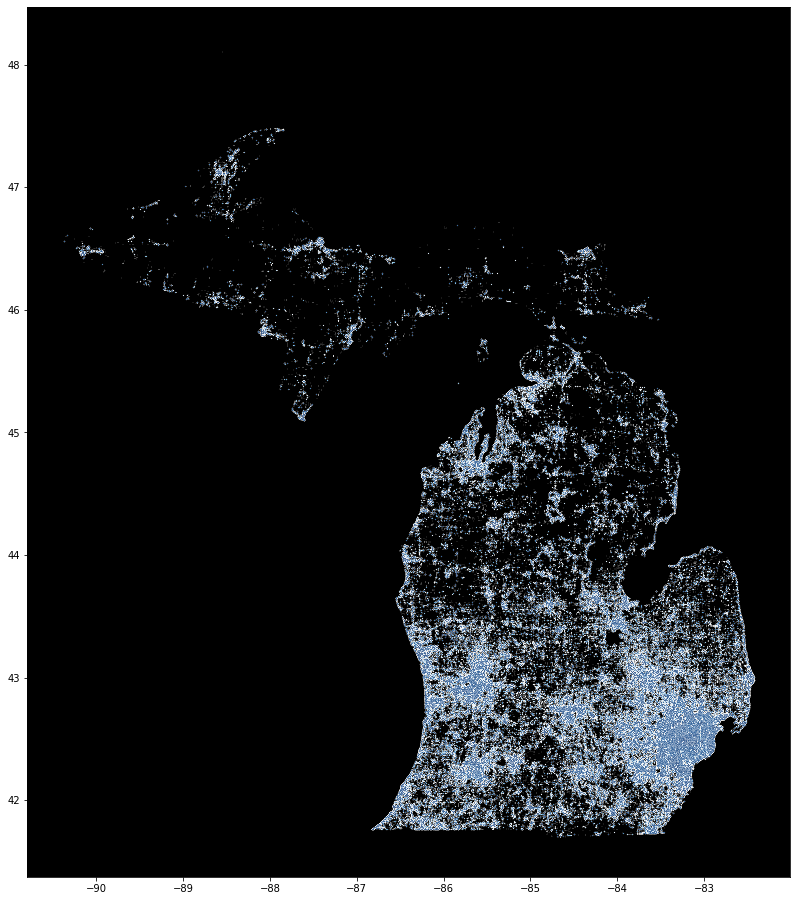

In [11]:
# mi_schools.plot(figsize=(32,16), cmap='Blues', edgecolor='white', linewidth=0.1)